# Ensemble Learning Methods Introduction

## Ensemble Methods:

Supervised Learning

Group of predictors (classifiers / regressors)





### 1. **B**ootstrap **Agg**regat**ing** or [Bagging](https://en.wikipedia.org/wiki/Bootstrap_aggregating)
* [Scikit- Learn Reference](http://scikit-learn.org/stable/modules/ensemble.html#bagging)
* Bootstrap sampling: Sampling with replacement
* Combine by averaging the output (regression)
* Combine by voting (classification)
* Can be applied to many classifiers which includes ANN, CART, etc.

### 2. [Pasting](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html)
* Sampling without replacement

### 3. [Boosting](https://en.wikipedia.org/wiki/Boosting_(machine_learning)
* Train weak classifiers 
* Add them to a final strong classifier by weighting. Weighting by accuracy (typically)
* Once added, the data are reweighted
  * Misclassified samples gain weight 
  * Correctly classified samples lose weight (Exception: Boost by majority and BrownBoost - decrease the weight of repeatedly misclassified examples). 
  * Algo are forced to learn more from misclassified samples
  
    
### 4. [Stacking](http://blog.kaggle.com/2016/12/27/a-kagglers-guide-to-model-stacking-in-practice/)
* Also known as Stacked generalization
* [From Kaggle:](http://blog.kaggle.com/2016/12/27/a-kagglers-guide-to-model-stacking-in-practice/) Combine information from multiple predictive models to generate a new model. Often times the stacked model (also called 2nd-level model) will outperform each of the individual models due its smoothing nature and ability to highlight each base model where it performs best and discredit each base model where it performs poorly. For this reason, stacking is most effective when the base models are significantly different. 
* Training a learning algorithm to combine the predictions of several other learning algorithms. 
  * Step 1: Train learning algo
  * Step 2: Combiner algo is trained using algo predictions from step 1.  


### 5. Other Ensemble Methods:

[Wikipedia](https://en.wikipedia.org/wiki/Ensemble_learning)
* Bayes optimal classifier
  * An ensemble of all the hypotheses in the hypothesis space. 
  * Each hypothesis is given a vote proportional to the likelihood that the training dataset would be sampled from a system if that hypothesis were true. 
  * To facilitate training data of finite size, the vote of each hypothesis is also multiplied by the prior probability of that hypothesis. 
* Bayesian parameter averaging
  * an ensemble technique that seeks to approximate the Bayes Optimal Classifier by sampling hypotheses from the hypothesis space, and combining them using Bayes' law.
  * Unlike the Bayes optimal classifier, Bayesian model averaging (BMA) can be practically implemented. 
  * Hypotheses are typically sampled using a Monte Carlo sampling technique such as MCMC. 
* Bayesian model combination
  * Instead of sampling each model in the ensemble individually, it samples from the space of possible ensembles (with model weightings drawn randomly from a Dirichlet distribution having uniform parameters). 
  * This modification overcomes the tendency of BMA to converge toward giving all of the weight to a single model. 
  * Although BMC is somewhat more computationally expensive than BMA, it tends to yield dramatically better results. The results from BMC have been shown to be better on average (with statistical significance) than BMA, and bagging.
* Bucket of models
  * An ensemble technique in which a model selection algorithm is used to choose the best model for each problem. 
  * When tested with only one problem, a bucket of models can produce no better results than the best model in the set, but when evaluated across many problems, it will typically produce much better results, on average, than any model in the set.


R released
* BMS (an acronym for Bayesian Model Selection) package
* BAS (an acronym for Bayesian Adaptive Sampling) package
* BMA package

**Note: Ensemble methods**

* Work best with indepedent predictors

* Best to utilise different algorithms


***

# Bagging ML Algo - Decision Tree

## **B**ootstrap **Agg**regat**ing** or [Bagging](https://en.wikipedia.org/wiki/Bootstrap_aggregating)


* [Scikit- Learn Reference](http://scikit-learn.org/stable/modules/ensemble.html#bagging)
* Bootstrap sampling: Sampling with replacement
* Combine by averaging the output (regression)
* Combine by voting (classification)
* Can be applied to many classifiers which includes ANN, CART, etc.

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [2]:
df = sns.load_dataset('titanic')

In [3]:
df.shape

(891, 15)

In [4]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
df.dropna(inplace=True)

In [6]:
df['pclass'].unique()

array([1, 3, 2])

In [7]:
df['pclass'].value_counts()

1    157
2     15
3     10
Name: pclass, dtype: int64

In [8]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [9]:
df['sex'].value_counts()

male      94
female    88
Name: sex, dtype: int64

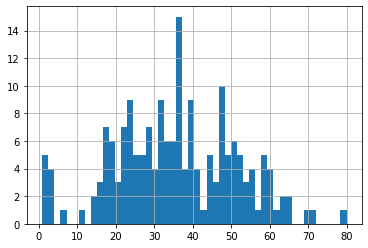

In [10]:
df['age'].hist(bins=50);

## Data Pre-processing

In [11]:
X = df[['pclass', 'sex', 'age']]

In [12]:
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()

In [13]:
X['sex'] = lb.fit_transform(X['sex'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [14]:
X.head()

,pclass,sex,age
1,1,0,38.0
3,1,0,35.0
6,1,1,54.0
10,3,0,4.0
11,1,0,58.0


In [15]:
X.shape

(182, 3)

In [16]:
X.describe()

,pclass,sex,age
count,182.000000,182.000000,182.000000
mean,1.192308,0.516484,35.623187
std,0.516411,0.501107,15.671615
min,1.000000,0.000000,0.920000
25%,1.000000,0.000000,24.000000
50%,1.000000,1.000000,36.000000
75%,1.000000,1.000000,47.750000
max,3.000000,1.000000,80.000000


In [17]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182 entries, 1 to 889
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pclass  182 non-null    int64  
 1   sex     182 non-null    int64  
 2   age     182 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 5.7 KB


In [18]:
y = df['survived']

In [19]:
y.value_counts()

1    123
0     59
Name: survived, dtype: int64

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [23]:
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, roc_auc_score
def print_score(clf, X_train, X_test, y_train, y_test, train=True):
    '''
    v0.1 Follow the scikit learn library format in terms of input
    print the accuracy score, classification report and confusion matrix of classifier
    '''
    lb = preprocessing.LabelBinarizer()
    lb.fit(y_train)
    if train:
        '''
        training performance
        '''
        res = clf.predict(X_train)
        print("Train Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, 
                                                                res)))
        print("Classification Report: \n {}\n".format(classification_report(y_train, 
                                                                            res)))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, 
                                                                  res)))
        print("ROC AUC: {0:.4f}\n".format(roc_auc_score(lb.transform(y_train), 
                                                      lb.transform(res))))

        res = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))
        
    elif train==False:
        '''
        test performance
        '''
        res_test = clf.predict(X_test)
        print("Test Result:\n")        
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, 
                                                                res_test)))
        print("Classification Report: \n {}\n".format(classification_report(y_test, 
                                                                            res_test)))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, 
                                                                  res_test)))   
        print("ROC AUC: {0:.4f}\n".format(roc_auc_score(lb.transform(y_test), 
                                                      lb.transform(res_test))))
        

## Decision Tree

In [24]:
clf = DecisionTreeClassifier(random_state=42)

In [25]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [26]:
print_score(clf, X_train, X_test, y_train, y_test, train=True)
print_score(clf, X_train, X_test, y_train, y_test, train=False)

Train Result:

accuracy score: 0.9449

Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.93      0.92        42
           1       0.96      0.95      0.96        85

    accuracy                           0.94       127
   macro avg       0.94      0.94      0.94       127
weighted avg       0.95      0.94      0.95       127


Confusion Matrix: 
 [[39  3]
 [ 4 81]]

ROC AUC: 0.9408

Average Accuracy: 	 0.7481
Accuracy SD: 		 0.0835
Test Result:

accuracy score: 0.7455

Classification Report: 
               precision    recall  f1-score   support

           0       0.59      0.59      0.59        17
           1       0.82      0.82      0.82        38

    accuracy                           0.75        55
   macro avg       0.70      0.70      0.70        55
weighted avg       0.75      0.75      0.75        55


Confusion Matrix: 
 [[10  7]
 [ 7 31]]

ROC AUC: 0.7020



***

## Bagging (oob_score=False)

In [27]:
bag_clf = BaggingClassifier(base_estimator=clf, n_estimators=1000,
                            bootstrap=True, n_jobs=-1,
                            random_state=42)

In [28]:
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=42,
  

In [29]:
print_score(clf, X_train, X_test, y_train, y_test, train=True)
print_score(clf, X_train, X_test, y_train, y_test, train=False)

Train Result:

accuracy score: 0.9449

Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.93      0.92        42
           1       0.96      0.95      0.96        85

    accuracy                           0.94       127
   macro avg       0.94      0.94      0.94       127
weighted avg       0.95      0.94      0.95       127


Confusion Matrix: 
 [[39  3]
 [ 4 81]]

ROC AUC: 0.9408

Average Accuracy: 	 0.7481
Accuracy SD: 		 0.0835
Test Result:

accuracy score: 0.7455

Classification Report: 
               precision    recall  f1-score   support

           0       0.59      0.59      0.59        17
           1       0.82      0.82      0.82        38

    accuracy                           0.75        55
   macro avg       0.70      0.70      0.70        55
weighted avg       0.75      0.75      0.75        55


Confusion Matrix: 
 [[10  7]
 [ 7 31]]

ROC AUC: 0.7020



***

## Bagging (oob_score=True)



Use out-of-bag samples to estimate the generalization accuracy

In [30]:
bag_clf = BaggingClassifier(base_estimator=clf, n_estimators=1000,
                            bootstrap=True, oob_score=True,
                            n_jobs=-1, random_state=42)

In [31]:
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=42,
  

In [32]:
bag_clf.oob_score_

0.7480314960629921

In [33]:
print_score(clf, X_train, X_test, y_train, y_test, train=True)
print_score(clf, X_train, X_test, y_train, y_test, train=False)

Train Result:

accuracy score: 0.9449

Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.93      0.92        42
           1       0.96      0.95      0.96        85

    accuracy                           0.94       127
   macro avg       0.94      0.94      0.94       127
weighted avg       0.95      0.94      0.95       127


Confusion Matrix: 
 [[39  3]
 [ 4 81]]

ROC AUC: 0.9408

Average Accuracy: 	 0.7481
Accuracy SD: 		 0.0835
Test Result:

accuracy score: 0.7455

Classification Report: 
               precision    recall  f1-score   support

           0       0.59      0.59      0.59        17
           1       0.82      0.82      0.82        38

    accuracy                           0.75        55
   macro avg       0.70      0.70      0.70        55
weighted avg       0.75      0.75      0.75        55


Confusion Matrix: 
 [[10  7]
 [ 7 31]]

ROC AUC: 0.7020



***

# Bagging ML Algo - RF & Extra-Trees

## **B**ootstrap **Agg**regat**ing** or [Bagging]

(https://en.wikipedia.org/wiki/Bootstrap_aggregating)
* [Scikit- Learn Reference](http://scikit-learn.org/stable/modules/ensemble.html#bagging)
* Bootstrap sampling: Sampling with replacement
* Combine by averaging the output (regression)
* Combine by voting (classification)
* Can be applied to many classifiers which includes ANN, CART, etc.

In [34]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [35]:
df = sns.load_dataset('titanic')

In [36]:
df.shape

(891, 15)

In [37]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [38]:
df.dropna(inplace=True)

In [39]:
df['pclass'].unique()

array([1, 3, 2])

In [40]:
df['pclass'].value_counts()

1    157
2     15
3     10
Name: pclass, dtype: int64

In [41]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [42]:
df['sex'].value_counts()

male      94
female    88
Name: sex, dtype: int64

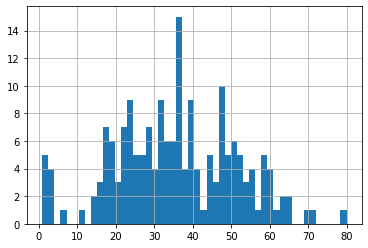

In [43]:
df['age'].hist(bins=50);

## Data Pre-processing

In [44]:
X = df[['pclass', 'sex', 'age']]

In [45]:
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()

In [46]:
X['sex'] = lb.fit_transform(X['sex'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [47]:
X.head()

,pclass,sex,age
1,1,0,38.0
3,1,0,35.0
6,1,1,54.0
10,3,0,4.0
11,1,0,58.0


In [48]:
X.shape

(182, 3)

In [49]:
X.describe()

,pclass,sex,age
count,182.000000,182.000000,182.000000
mean,1.192308,0.516484,35.623187
std,0.516411,0.501107,15.671615
min,1.000000,0.000000,0.920000
25%,1.000000,0.000000,24.000000
50%,1.000000,1.000000,36.000000
75%,1.000000,1.000000,47.750000
max,3.000000,1.000000,80.000000


In [50]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182 entries, 1 to 889
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pclass  182 non-null    int64  
 1   sex     182 non-null    int64  
 2   age     182 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 5.7 KB


In [51]:
y = df['survived']

In [52]:
y.value_counts()

1    123
0     59
Name: survived, dtype: int64

***

## Random Forest

[paper](http://ect.bell-labs.com/who/tkh/publications/papers/odt.pdf)

* Ensemble of Decision Trees

* Training via the bagging method (Repeated sampling with replacement)
  * Bagging: Sample from samples
  * RF: Sample from predictors. $m=sqrt(p)$ for classification and $m=p/3$ for regression problems.

* Utilise uncorrelated trees

Random Forest
* Sample both observations and features of training data

Bagging
* Samples only observations at random
* Decision Tree select best feature when splitting a node

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [56]:
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, roc_auc_score
def print_score(clf, X_train, X_test, y_train, y_test, train=True):
    '''
    v0.1 Follow the scikit learn library format in terms of input
    print the accuracy score, classification report and confusion matrix of classifier
    '''
    lb = preprocessing.LabelBinarizer()
    lb.fit(y_train)
    if train:
        '''
        training performance
        '''
        res = clf.predict(X_train)
        print("Train Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, 
                                                                res)))
        print("Classification Report: \n {}\n".format(classification_report(y_train, 
                                                                            res)))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, 
                                                                  res)))
        print("ROC AUC: {0:.4f}\n".format(roc_auc_score(lb.transform(y_train), 
                                                      lb.transform(res))))

        res = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))
        
    elif train==False:
        '''
        test performance
        '''
        res_test = clf.predict(X_test)
        print("Test Result:\n")        
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, 
                                                                res_test)))
        print("Classification Report: \n {}\n".format(classification_report(y_test, 
                                                                            res_test)))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, 
                                                                  res_test)))   
        print("ROC AUC: {0:.4f}\n".format(roc_auc_score(lb.transform(y_test), 
                                                      lb.transform(res_test))))
        

In [57]:
rf_clf = RandomForestClassifier(random_state=42)

In [58]:
rf_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [59]:
print_score(rf_clf, X_train, X_test, y_train, y_test, train=True)
print_score(rf_clf, X_train, X_test, y_train, y_test, train=False)

Train Result:

accuracy score: 0.9325

Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.87      0.90        55
           1       0.94      0.96      0.95       108

    accuracy                           0.93       163
   macro avg       0.93      0.92      0.92       163
weighted avg       0.93      0.93      0.93       163


Confusion Matrix: 
 [[ 48   7]
 [  4 104]]

ROC AUC: 0.9178

Average Accuracy: 	 0.7728
Accuracy SD: 		 0.1231
Test Result:

accuracy score: 0.9474

Classification Report: 
               precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      0.93      0.97        15

    accuracy                           0.95        19
   macro avg       0.90      0.97      0.93        19
weighted avg       0.96      0.95      0.95        19


Confusion Matrix: 
 [[ 4  0]
 [ 1 14]]

ROC AUC: 0.9667



## Grid Search

In [60]:
from sklearn.pipeline import Pipeline

In [61]:
from sklearn.model_selection import GridSearchCV

In [62]:
rf_clf = RandomForestClassifier(random_state=42)

In [63]:
params_grid = {"max_depth": [3, None],
               "min_samples_split": [2, 3, 10],
               "min_samples_leaf": [1, 3, 10],
               "bootstrap": [True, False],
               "criterion": ['gini', 'entropy']}

In [64]:
grid_search = GridSearchCV(rf_clf, params_grid,
                           n_jobs=-1, cv=5,
                           verbose=1, scoring='accuracy')

In [65]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   20.4s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   33.6s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [66]:
grid_search.best_score_

0.8035984848484847

In [67]:
grid_search.best_estimator_.get_params()

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [68]:
print_score(grid_search, X_train, X_test, y_train, y_test, train=True)
print_score(grid_search, X_train, X_test, y_train, y_test, train=False)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Train Result:

accuracy score: 0.8712

Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.78      0.80        55
           1       0.89      0.92      0.90       108

    accuracy                           0.87       163
   macro avg       0.86      0.85      0.85       163
weighted avg       0.87      0.87      0.87       163


Confusion Matrix: 
 [[43 12]
 [ 9 99]]

ROC AUC: 0.8492

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   19.9s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   32.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   19.7s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   32.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   19.8s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   32.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   19.8s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   32.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   20.0s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   32.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   19.8s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   32.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   19.7s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   32.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   19.8s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   32.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   19.8s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   32.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   19.9s


Average Accuracy: 	 0.7610
Accuracy SD: 		 0.1091
Test Result:

accuracy score: 0.9474

Classification Report: 
               precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      0.93      0.97        15

    accuracy                           0.95        19
   macro avg       0.90      0.97      0.93        19
weighted avg       0.96      0.95      0.95        19


Confusion Matrix: 
 [[ 4  0]
 [ 1 14]]

ROC AUC: 0.9667



[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   32.9s finished


***

## Extra-Trees (Extremely Randomized Trees) Ensemble



[scikit-learn](http://scikit-learn.org/stable/modules/ensemble.html#bagging)

* Random Forest is build upon Decision Tree
* Decision Tree node splitting is based on gini or entropy or some other algorithms
* Extra-Trees make use of random thresholds for each feature unlike Decision Tree


In [69]:
from sklearn.ensemble import ExtraTreesClassifier

In [70]:
xt_clf = ExtraTreesClassifier(random_state=42)

In [71]:
xt_clf.fit(X_train, y_train)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=42, verbose=0,
                     warm_start=False)

In [72]:
print_score(xt_clf, X_train, X_test, y_train, y_test, train=True)
print_score(xt_clf, X_train, X_test, y_train, y_test, train=False)

Train Result:

accuracy score: 0.9325

Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.93      0.90        55
           1       0.96      0.94      0.95       108

    accuracy                           0.93       163
   macro avg       0.92      0.93      0.93       163
weighted avg       0.93      0.93      0.93       163


Confusion Matrix: 
 [[ 51   4]
 [  7 101]]

ROC AUC: 0.9312

Average Accuracy: 	 0.7368
Accuracy SD: 		 0.1089
Test Result:

accuracy score: 0.9474

Classification Report: 
               precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      0.93      0.97        15

    accuracy                           0.95        19
   macro avg       0.90      0.97      0.93        19
weighted avg       0.96      0.95      0.95        19


Confusion Matrix: 
 [[ 4  0]
 [ 1 14]]

ROC AUC: 0.9667



***

In [73]:
def eval_gini(y_true, y_prob):
    """
    Original author CPMP : https://www.kaggle.com/cpmpml
    In kernel : https://www.kaggle.com/cpmpml/extremely-fast-gini-computation
    """
    y_true = np.asarray(y_true)
    y_true = y_true[np.argsort(y_prob)]
    ntrue = 0
    gini = 0
    delta = 0
    n = len(y_true)
    for i in range(n-1, -1, -1):
        y_i = y_true[i]
        ntrue += y_i
        gini += y_i * delta
        delta += 1 - y_i
    gini = 1 - 2 * gini / (ntrue * (n - ntrue))
    return gini

***

# Boosting ML Algo - AdaBoost and GBM

## Load Data

In [74]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [75]:
df = sns.load_dataset('titanic')

In [76]:
df.shape

(891, 15)

In [77]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [78]:
df.dropna(inplace=True)

In [79]:
df['pclass'].unique()

array([1, 3, 2])

In [80]:
df['pclass'].value_counts()

1    157
2     15
3     10
Name: pclass, dtype: int64

In [81]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [82]:
df['sex'].value_counts()

male      94
female    88
Name: sex, dtype: int64

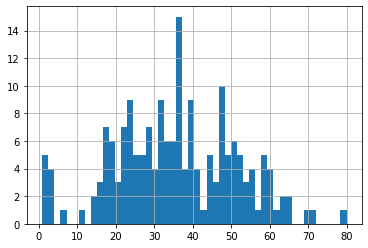

In [83]:
df['age'].hist(bins=50);

## Data Pre-processing

In [84]:
X = df[['pclass', 'sex', 'age']]

In [85]:
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()

In [86]:
X['sex'] = lb.fit_transform(X['sex'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [87]:
X.head()

,pclass,sex,age
1,1,0,38.0
3,1,0,35.0
6,1,1,54.0
10,3,0,4.0
11,1,0,58.0


In [88]:
X.shape

(182, 3)

In [89]:
X.describe()

,pclass,sex,age
count,182.000000,182.000000,182.000000
mean,1.192308,0.516484,35.623187
std,0.516411,0.501107,15.671615
min,1.000000,0.000000,0.920000
25%,1.000000,0.000000,24.000000
50%,1.000000,1.000000,36.000000
75%,1.000000,1.000000,47.750000
max,3.000000,1.000000,80.000000


In [90]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182 entries, 1 to 889
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pclass  182 non-null    int64  
 1   sex     182 non-null    int64  
 2   age     182 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 5.7 KB


In [91]:
y = df['survived']

In [92]:
y.value_counts()

1    123
0     59
Name: survived, dtype: int64

***

In [93]:
from sklearn.model_selection import train_test_split

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [95]:
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, roc_auc_score
def print_score(clf, X_train, X_test, y_train, y_test, train=True):
    '''
    v0.1 Follow the scikit learn library format in terms of input
    print the accuracy score, classification report and confusion matrix of classifier
    '''
    lb = preprocessing.LabelBinarizer()
    lb.fit(y_train)
    if train:
        '''
        training performance
        '''
        res = clf.predict(X_train)
        print("Train Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, 
                                                                res)))
        print("Classification Report: \n {}\n".format(classification_report(y_train, 
                                                                            res)))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, 
                                                                  res)))
        print("ROC AUC: {0:.4f}\n".format(roc_auc_score(lb.transform(y_train), 
                                                      lb.transform(res))))

        res = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))
        
    elif train==False:
        '''
        test performance
        '''
        res_test = clf.predict(X_test)
        print("Test Result:\n")        
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, 
                                                                res_test)))
        print("Classification Report: \n {}\n".format(classification_report(y_test, 
                                                                            res_test)))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, 
                                                                  res_test)))   
        print("ROC AUC: {0:.4f}\n".format(roc_auc_score(lb.transform(y_test), 
                                                      lb.transform(res_test))))
        

***

## Boosting (Hypothesis Boosting)



* Combine several weak learners into a strong learner. 

* Train predictors sequentially

## AdaBoost / Adaptive Boosting



[Robert Schapire](http://rob.schapire.net/papers/explaining-adaboost.pdf)

[Wikipedia](https://en.wikipedia.org/wiki/AdaBoost)

[Chris McCormick](http://mccormickml.com/2013/12/13/adaboost-tutorial/)

[Scikit Learn AdaBoost](http://scikit-learn.org/stable/modules/ensemble.html#adaboost)

1995

As above for Boosting:
* Similar to human learning, the algo learns from past mistakes by focusing more on difficult problems it did not get right in prior learning. 
* In machine learning speak, it pays more attention to training instances that previously underfitted.

Source: Scikit-Learn:

* Fit a sequence of weak learners (i.e., models that are only slightly better than random guessing, such as small decision trees) on repeatedly modified versions of the data. 
* The predictions from all of them are then combined through a weighted majority vote (or sum) to produce the final prediction.
* The data modifications at each so-called boosting iteration consist of applying weights $w_1, w_2, …, w_N$ to each of the training samples. 
* Initially, those weights are all set to $w_i = 1/N$, so that the first step simply trains a weak learner on the original data. 
* For each successive iteration, the sample weights are individually modified and the learning algorithm is reapplied to the reweighted data. 
* At a given step, those training examples that were incorrectly predicted by the boosted model induced at the previous step have their weights increased, whereas the weights are decreased for those that were predicted correctly. 
* As iterations proceed, examples that are difficult to predict receive ever-increasing influence. Each subsequent weak learner is thereby forced to concentrate on the examples that are missed by the previous ones in the sequence.



In [96]:
from sklearn.ensemble import AdaBoostClassifier

In [97]:
ada_clf = AdaBoostClassifier()

In [98]:
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

[SAMME16](https://web.stanford.edu/~hastie/Papers/samme.pdf) (Stagewise Additive Modeling using a Multiclass Exponential loss function).

R stands for real

In [99]:
print_score(ada_clf, X_train, X_test, y_train, y_test, train=True)
print_score(ada_clf, X_train, X_test, y_train, y_test, train=False)

Train Result:

accuracy score: 0.8583

Classification Report: 
               precision    recall  f1-score   support

           0       0.75      0.79      0.77        38
           1       0.91      0.89      0.90        89

    accuracy                           0.86       127
   macro avg       0.83      0.84      0.83       127
weighted avg       0.86      0.86      0.86       127


Confusion Matrix: 
 [[30  8]
 [10 79]]

ROC AUC: 0.8386

Average Accuracy: 	 0.7468
Accuracy SD: 		 0.0957
Test Result:

accuracy score: 0.8000

Classification Report: 
               precision    recall  f1-score   support

           0       0.75      0.71      0.73        21
           1       0.83      0.85      0.84        34

    accuracy                           0.80        55
   macro avg       0.79      0.78      0.79        55
weighted avg       0.80      0.80      0.80        55


Confusion Matrix: 
 [[15  6]
 [ 5 29]]

ROC AUC: 0.7836



## AdaBoost with Random Forest

In [100]:
from sklearn.ensemble import RandomForestClassifier

In [101]:
ada_clf = AdaBoostClassifier(RandomForestClassifier())

In [102]:
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=RandomForestClassifier(bootstrap=True,
                                                         ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features='auto',
                                                         max_leaf_nodes=None,
                                                         max_samples=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                       

In [103]:
print_score(ada_clf, X_train, X_test, y_train, y_test, train=True)
print_score(ada_clf, X_train, X_test, y_train, y_test, train=False)

Train Result:

accuracy score: 0.9291

Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.89      0.88        38
           1       0.95      0.94      0.95        89

    accuracy                           0.93       127
   macro avg       0.91      0.92      0.92       127
weighted avg       0.93      0.93      0.93       127


Confusion Matrix: 
 [[34  4]
 [ 5 84]]

ROC AUC: 0.9193

Average Accuracy: 	 0.7186
Accuracy SD: 		 0.1187
Test Result:

accuracy score: 0.8545

Classification Report: 
               precision    recall  f1-score   support

           0       0.81      0.81      0.81        21
           1       0.88      0.88      0.88        34

    accuracy                           0.85        55
   macro avg       0.85      0.85      0.85        55
weighted avg       0.85      0.85      0.85        55


Confusion Matrix: 
 [[17  4]
 [ 4 30]]

ROC AUC: 0.8459



***

## Gradient Boosting / Gradient Boosting Machine (GBM)

Works for both regression and classification

[Wikipedia](https://en.wikipedia.org/wiki/Gradient_boosting)

* Sequentially adding predictors
* Each one correcting its predecessor
* Fit new predictor to the residual errors

Compare this to AdaBoost: 
* Alter instance weights at every iteration


**Step 1. **

  $$Y = F(x) + \epsilon$$

**Step 2. **

  $$\epsilon = G(x) + \epsilon_2$$

  Substituting (2) into (1), we get:
  
  $$Y = F(x) + G(x) + \epsilon_2$$
    
**Step 3. **

  $$\epsilon_2 = H(x)  + \epsilon_3$$

Now:
  
  $$Y = F(x) + G(x) + H(x)  + \epsilon_3$$
  
Finally, by adding weighting  
  
  $$Y = \alpha F(x) + \beta G(x) + \gamma H(x)  + \epsilon_4$$

Gradient boosting involves three elements:

* **Loss function to be optimized**: Loss function depends on the type of problem being solved. In the case of regression problems, mean squared error is used, and in classification problems, logarithmic loss will be used. In boosting, at each stage, unexplained loss from prior iterations will be optimized rather than starting from scratch.

* **Weak learner to make predictions**: Decision trees are used as a weak learner in gradient boosting.

* **Additive model to add weak learners to minimize the loss function**: Trees are added one at a time and existing trees in the model are not changed. The gradient descent procedure is used to minimize the loss when adding trees.

In [104]:
from sklearn.ensemble import GradientBoostingClassifier

In [105]:
gbc_clf = GradientBoostingClassifier()
gbc_clf.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [106]:
print_score(gbc_clf, X_train, X_test, y_train, y_test, train=True)
print_score(gbc_clf, X_train, X_test, y_train, y_test, train=False)

Train Result:

accuracy score: 0.9291

Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.89      0.88        38
           1       0.95      0.94      0.95        89

    accuracy                           0.93       127
   macro avg       0.91      0.92      0.92       127
weighted avg       0.93      0.93      0.93       127


Confusion Matrix: 
 [[34  4]
 [ 5 84]]

ROC AUC: 0.9193

Average Accuracy: 	 0.7327
Accuracy SD: 		 0.0700
Test Result:

accuracy score: 0.8727

Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.81      0.83        21
           1       0.89      0.91      0.90        34

    accuracy                           0.87        55
   macro avg       0.87      0.86      0.86        55
weighted avg       0.87      0.87      0.87        55


Confusion Matrix: 
 [[17  4]
 [ 3 31]]

ROC AUC: 0.8606



***